In [2]:
import os
import cv2
import numpy as np

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [3]:
#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [4]:
#Plot Images
import matplotlib.pyplot as plt

In [5]:
folder_dir = 'Flowers'
ignore=[".DS_Store",".git",".gitignore",".ipynb_checkpoints"]


In [6]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir(folder_dir):
    if folder in ignore:
        continue
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

In [7]:
# Converting images to numeric data
data_arr = np.array(data)
label_arr = np.array(label)

In [8]:
# using the Label encoder and normalize the data
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

In [9]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [10]:
# Building a neural network

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

2022-04-14 00:14:57.924907: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
#Before compiling the model we need to create more training images to prevent overfitting:

datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [12]:
# Now let’s compile the neural network model:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=64
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),epochs = epochs,validation_data = (X_test,y_test),verbose = 1)

/Users/ayushkaushik/Library/Python/3.8/lib/python/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/var/folders/x_/k_ktl11j24sg_s1fm5fmnl480000gn/T/ipykernel_31147/2270321765.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),epochs = epochs,validation_data = (X_test,y_test),verbose = 1)


Epoch 1/64
108/108 [==============================] - 587s 5s/step - loss: 1.5039 - accuracy: 0.3047 - val_loss: 1.3014 - val_accuracy: 0.4132
Epoch 2/64
108/108 [==============================] - 740s 7s/step - loss: 1.3647 - accuracy: 0.3962 - val_loss: 1.2084 - val_accuracy: 0.4792
Epoch 3/64
108/108 [==============================] - 457s 4s/step - loss: 1.2860 - accuracy: 0.4498 - val_loss: 1.1608 - val_accuracy: 0.5289
Epoch 4/64
108/108 [==============================] - 530s 5s/step - loss: 1.2311 - accuracy: 0.4958 - val_loss: 1.1772 - val_accuracy: 0.5012
Epoch 5/64
108/108 [==============================] - 742s 7s/step - loss: 1.1767 - accuracy: 0.5398 - val_loss: 1.0334 - val_accuracy: 0.5822
Epoch 6/64
108/108 [==============================] - 436s 4s/step - loss: 1.1455 - accuracy: 0.5514 - val_loss: 1.0489 - val_accuracy: 0.5891
Epoch 7/64
108/108 [==============================] - 438s 4s/step - loss: 1.1065 - accuracy: 0.5746 - val_loss: 1.0757 - val_accuracy: 0.5718

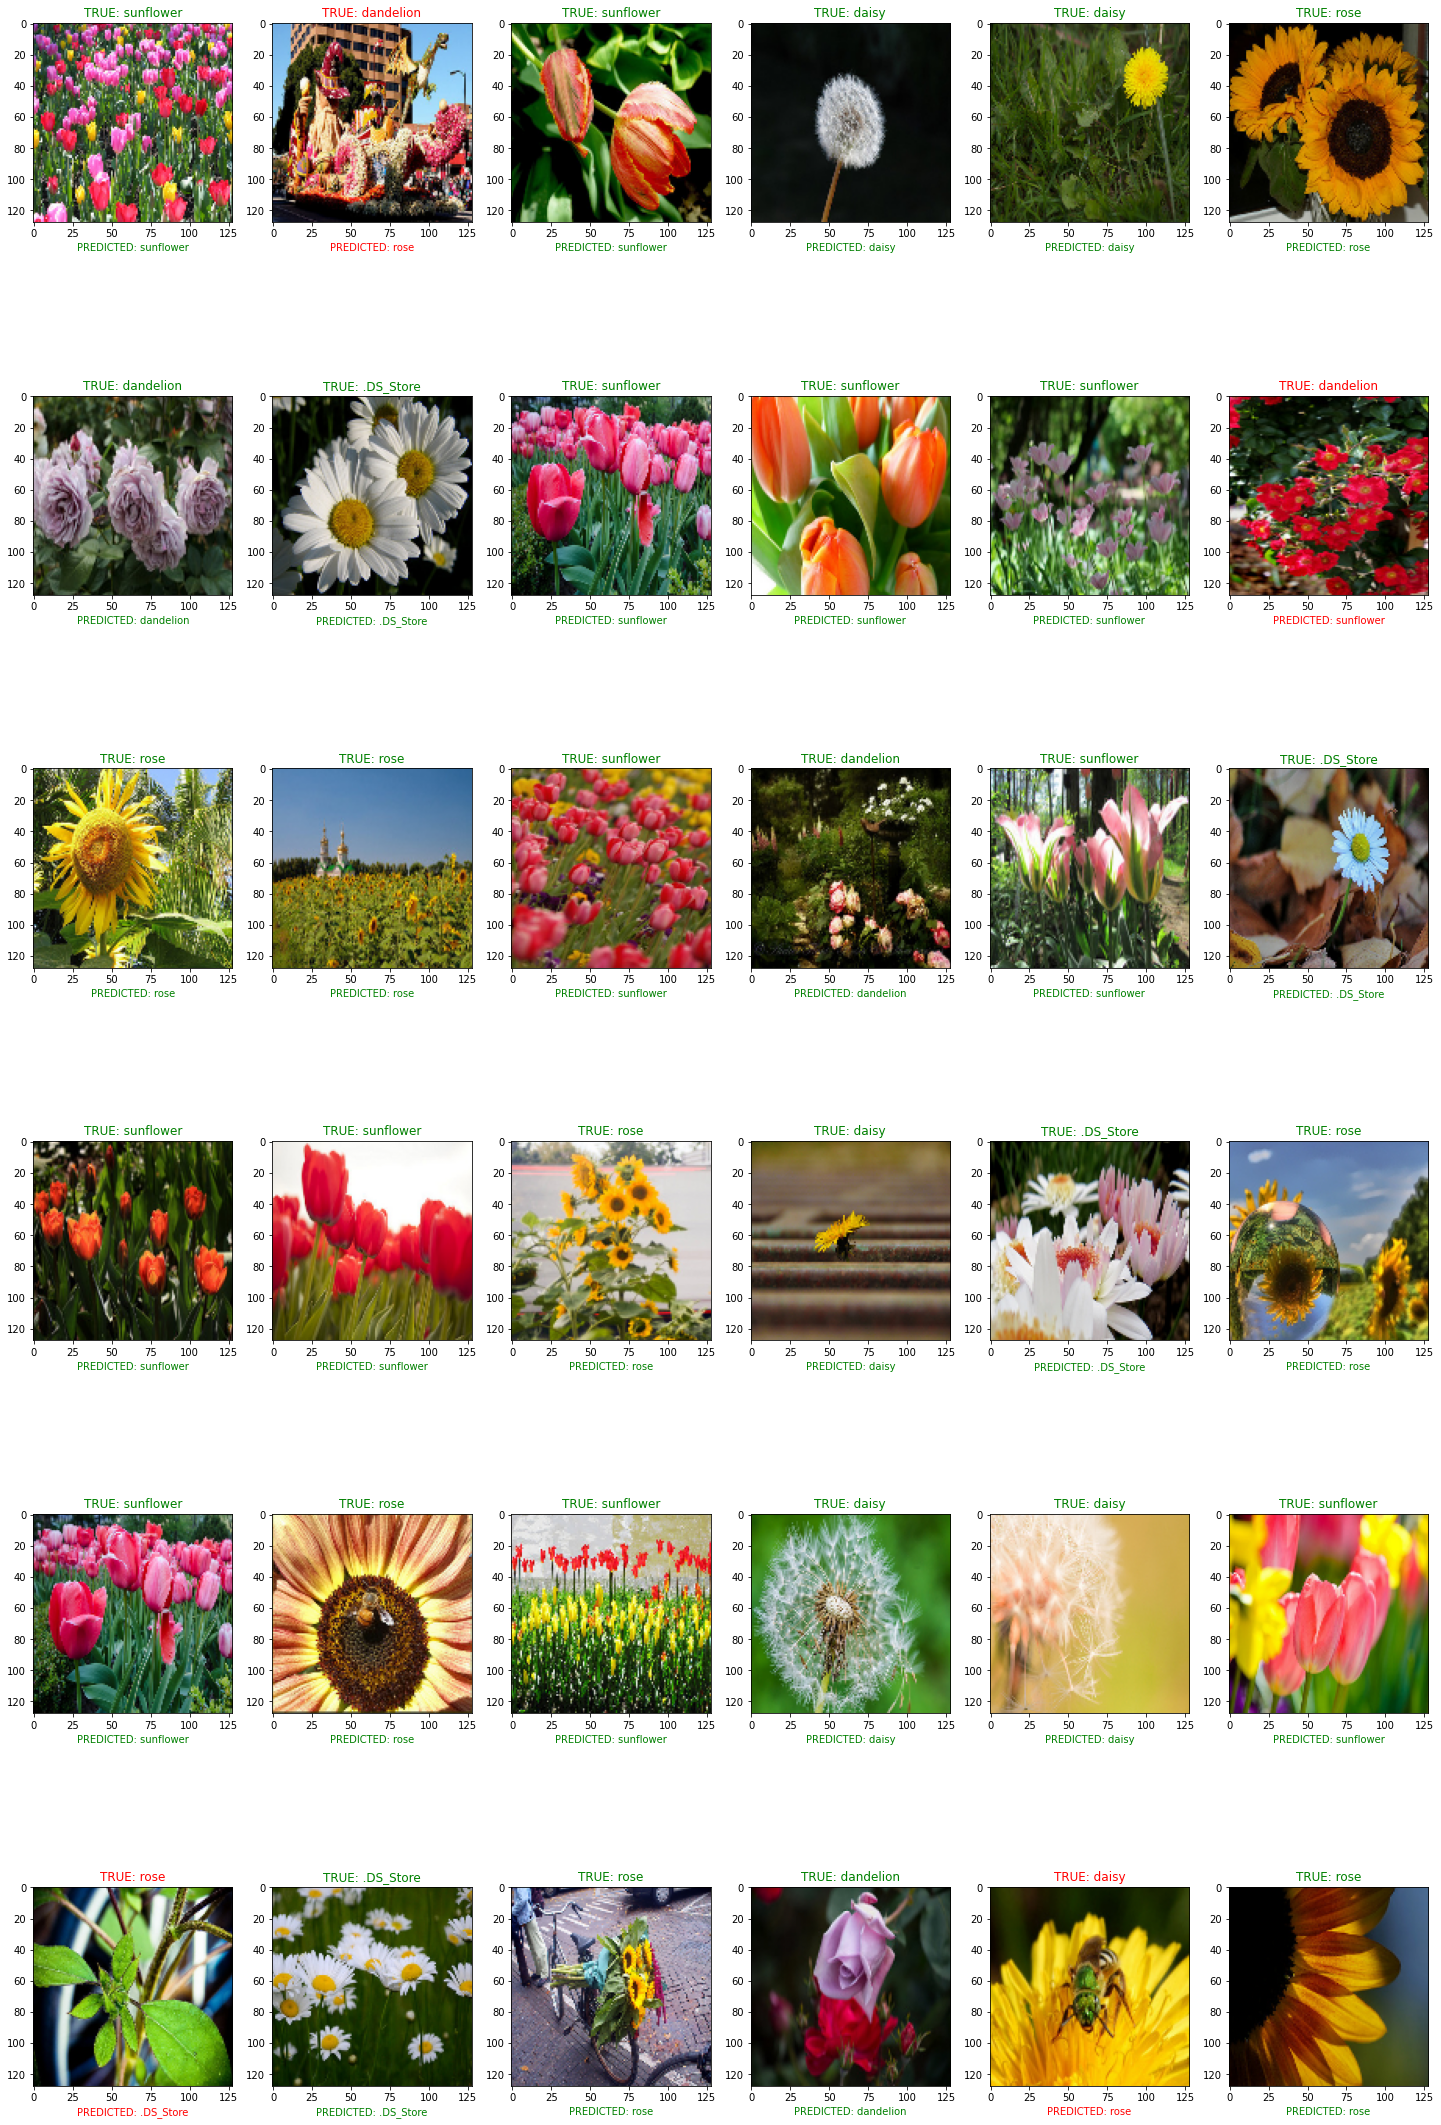

In [13]:
# Now let’s let the model if it recognize flowers properly:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')



In [22]:
categories

array(['.DS_Store', 'daisy', 'dandelion', 'rose', 'sunflower', 'tulip'],
      dtype='<U9')